In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import re

# Costs

File: FL, Noise: 0.2, Profit: -1102.53, Std: 0.01
File: FL, Noise: 0.4, Profit: -1093.23, Std: 0.02
File: FL, Noise: 0.6, Profit: -1098.66, Std: 0.06
File: FL, Noise: 0.8, Profit: -1100.33, Std: 0.1
File: FL, Noise: 1.0, Profit: -1090.28, Std: 0.01
File: FL, Noise: 2.0, Profit: -1115.58, Std: 0.01
File: LL, Noise: 0.0, Profit: -1122.82, Std: 1.9
File: LL, Noise: 0.2, Profit: -1113.82, Std: 1.28
File: LL, Noise: 0.4, Profit: -1121.0, Std: 0.38
File: LL, Noise: 0.6, Profit: -1123.48, Std: 0.77
File: LL, Noise: 0.8, Profit: -1140.17, Std: 1.73
File: LL, Noise: 1.0, Profit: -1121.66, Std: 0.57
File: LL, Noise: 2.0, Profit: -1135.51, Std: 4.08


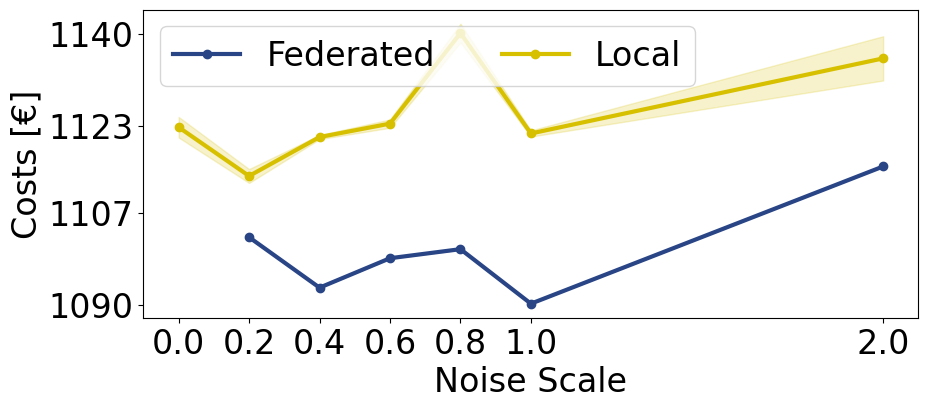

In [195]:
def load_cost_files_to_df(directory, building):
    # Load all CSV files from the specified directory that have 'cost' in their file name
    all_files = glob.glob(os.path.join(directory, "*Onlycost*.csv"))

    # Initialize an empty list to store individual dataframes
    data = []
    
    for file in all_files:
        df = pd.read_csv(file)
        filtered_df = df #[df['Building'] == building]
        profit = filtered_df.groupby("Building")["Total Profit"].min().mean().round(2)
        std = filtered_df.groupby("Building")["Total Profit"].std().min().round(2)
        
         # Extract the noise scale from the file name
        noise_scale_match = re.search(r'FORECAST(\d+)', file)
        if noise_scale_match:
            noise_scale = noise_scale_match.group(1)
            if noise_scale == '1':
                noise_scale = '1.0'
            elif noise_scale == '2':
                noise_scale = '2.0'
            else:
                noise_scale = f'{int(noise_scale) / 10:.1f}'
        
        else:
            noise_scale = 'unknown'
        
        # Extract the first part of the file name (e.g., "FL" or "LL")
        file_prefix = os.path.basename(file).split('_')[0]

        # Append the processed data
        data.append({
            'File Prefix': file_prefix,
            'Noise Scale': float(noise_scale),
            'Profit': profit,
            'Std': std
        })

        print(f"File: {file_prefix}, Noise: {noise_scale}, Profit: {profit}, Std: {std}")
    
    return data

def plot_data(df_combined):
    # Convert the list of dictionaries to a DataFrame
    df_combined = pd.DataFrame(df_combined)

    df_combined = df_combined[df_combined['Noise Scale'] <= 3]
    df_combined["Profit"] = -df_combined["Profit"]

    # Determine y-axis ticks
    y_min = df_combined['Profit'].min().round(0)
    y_max = df_combined['Profit'].max().round(0)
    y_middle1 = ((y_max - y_min) / 3 + y_min).round(0)
    y_middle2 = (2 * (y_max - y_min) / 3 + y_min).round(0)
    y_ticks = [y_min, y_middle1, y_middle2, y_max]
    
    # Plot the data
    plt.figure(figsize=(10, 4))

    for file_prefix in df_combined['File Prefix'].unique():
        subset = df_combined[df_combined['File Prefix'] == file_prefix]
        if file_prefix == 'FL':
            plt.plot(subset['Noise Scale'], subset['Profit'], marker='o', label='Federated', color="#294586", linewidth=3, alpha=1)
            plt.fill_between(subset['Noise Scale'], subset['Profit'] - subset['Std'], subset['Profit'] + subset['Std'], color="#294586", alpha=0.2)
        elif file_prefix == 'LL':
            plt.plot(subset['Noise Scale'], subset['Profit'], marker='o', label='Local', color="#D7C000", linewidth=3, alpha=1)
            plt.fill_between(subset['Noise Scale'], subset['Profit'] - subset['Std'], subset['Profit'] + subset['Std'], color="#D7C000", alpha=0.2)

    plt.xlabel('Noise Scale', fontsize=24)
    plt.ylabel('Costs [€]', fontsize=24)
    plt.xticks(sorted(df_combined['Noise Scale'].unique()), fontsize=24)  # Show specific x-axis values
    plt.yticks(y_ticks, fontsize=24)
    plt.legend(fontsize=24, loc='upper left', ncol=2)

    plt.savefig("fig/Impact_Forecast_Noise_Costs.pdf", format='pdf', bbox_inches='tight')

    plt.show()




#########################################################################

directory = r"results/04forecast_costs"
building = 10

# Get the combined dataframe
df_combined = load_cost_files_to_df(directory, building)
plot_data(df_combined)





In [193]:
df_combined

[{'File Prefix': 'FL', 'Noise Scale': 0.0, 'Profit': -1092.67, 'Std': 0.03},
 {'File Prefix': 'FL', 'Noise Scale': 0.2, 'Profit': -1102.53, 'Std': 0.01},
 {'File Prefix': 'FL', 'Noise Scale': 0.4, 'Profit': -1093.23, 'Std': 0.02},
 {'File Prefix': 'FL', 'Noise Scale': 0.6, 'Profit': -1098.66, 'Std': 0.06},
 {'File Prefix': 'FL', 'Noise Scale': 0.8, 'Profit': -1100.33, 'Std': 0.1},
 {'File Prefix': 'FL', 'Noise Scale': 1.0, 'Profit': -1090.28, 'Std': 0.01},
 {'File Prefix': 'FL', 'Noise Scale': 2.0, 'Profit': -1115.58, 'Std': 0.01},
 {'File Prefix': 'LL', 'Noise Scale': 0.0, 'Profit': -1122.82, 'Std': 1.9},
 {'File Prefix': 'LL', 'Noise Scale': 0.2, 'Profit': -1113.82, 'Std': 1.28},
 {'File Prefix': 'LL', 'Noise Scale': 0.4, 'Profit': -1121.0, 'Std': 0.38},
 {'File Prefix': 'LL', 'Noise Scale': 0.6, 'Profit': -1123.48, 'Std': 0.77},
 {'File Prefix': 'LL', 'Noise Scale': 0.8, 'Profit': -1140.17, 'Std': 1.73},
 {'File Prefix': 'LL', 'Noise Scale': 1.0, 'Profit': -1121.66, 'Std': 0.57},
 {

In [199]:
print("Local DIFF")
more_costs =  ((1135.51 - 1122.82)*100 /  1135.51)
print(more_costs)
print(1135.51 - 1122.82)

Federated DIFF
1.117559510704446
12.690000000000055


In [ ]:
print("Local DIFF")
more_costs =  ((1115.58 - 1092.67)*100 /  1115.58)
print(more_costs)
print(1115.58 - 1092.67)

# Emissions

File: FL, Noise: 0.0, Emissions: 3342.49, Std: 1.17
File: FL, Noise: 0.2, Emissions: 3351.06, Std: 0.61
File: FL, Noise: 0.4, Emissions: 3389.02, Std: 0.89
File: FL, Noise: 0.6, Emissions: 3351.51, Std: 1.84
File: FL, Noise: 0.8, Emissions: 3347.55, Std: 0.11
File: FL, Noise: 1.0, Emissions: 3425.46, Std: 0.75
File: FL, Noise: 2.0, Emissions: 3437.44, Std: 3.44
File: LL, Noise: 0.0, Emissions: 3430.64, Std: 2.35
File: LL, Noise: 0.2, Emissions: 3460.72, Std: 10.75
File: LL, Noise: 0.4, Emissions: 3452.01, Std: 8.48
File: LL, Noise: 0.6, Emissions: 3480.74, Std: 19.16
File: LL, Noise: 0.8, Emissions: 3419.16, Std: 7.44
File: LL, Noise: 1.0, Emissions: 3479.2, Std: 33.87
File: LL, Noise: 2.0, Emissions: 3591.08, Std: 43.05


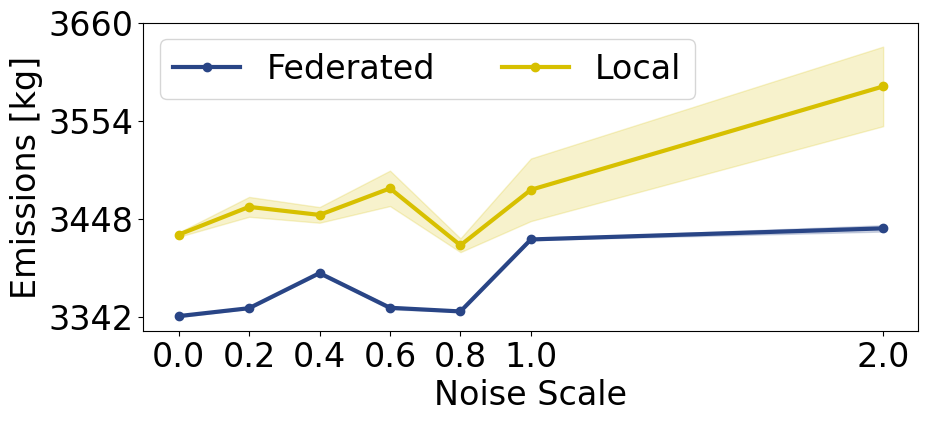

In [196]:
def load_cost_files_to_df(directory, building):
    # Load all CSV files from the specified directory that have 'cost' in their file name
    all_files = glob.glob(os.path.join(directory, "*Onlyemissions*.csv"))

    # Initialize an empty list to store individual dataframes
    data = []
    
    for file in all_files:
        df = pd.read_csv(file)
        filtered_df = df #[df['Building'] == building]
        emissions = filtered_df.groupby("Building")["Total Emissions"].min().mean().round(2)
        std = filtered_df.groupby("Building")["Total Emissions"].std().min().round(2)
        
         # Extract the noise scale from the file name
        noise_scale_match = re.search(r'FORECAST(\d+)', file)
        if noise_scale_match:
            noise_scale = noise_scale_match.group(1)
            if noise_scale == '1':
                noise_scale = '1.0'
            elif noise_scale == '2':
                noise_scale = '2.0'
            else:
                noise_scale = f'{int(noise_scale) / 10:.1f}'
        
        else:
            noise_scale = 'unknown'
        
        # Extract the first part of the file name (e.g., "FL" or "LL")
        file_prefix = os.path.basename(file).split('_')[0]

        # Append the processed data
        data.append({
            'File Prefix': file_prefix,
            'Noise Scale': float(noise_scale),
            'Emissions': emissions,
            'Std': std
        })

        print(f"File: {file_prefix}, Noise: {noise_scale}, Emissions: {emissions}, Std: {std}")
    
    return data

def plot_data(df_combined):
    # Convert the list of dictionaries to a DataFrame
    df_combined = pd.DataFrame(df_combined)

    # Filter the data to include only rows with Noise Scale <= 0.8
    df_combined = df_combined[df_combined['Noise Scale'] <= 3]

    # Plot the data
    plt.figure(figsize=(10, 4))

    # Determine y-axis ticks
    y_min = df_combined['Emissions'].min().round(0)
    y_max = df_combined['Emissions'].max().round(0) + 69
    y_middle1 = ((y_max - y_min) / 3 + y_min).round(0)
    y_middle2 = (2 * (y_max - y_min) / 3 + y_min).round(0)
    y_ticks = [y_min, y_middle1, y_middle2, y_max]

    for file_prefix in df_combined['File Prefix'].unique():
        subset = df_combined[df_combined['File Prefix'] == file_prefix]
        if file_prefix == 'FL':
            plt.plot(subset['Noise Scale'], subset['Emissions'], marker='o', label='Federated', color="#294586", linewidth=3, alpha=1)
            plt.fill_between(subset['Noise Scale'], subset['Emissions'] - subset['Std'], subset['Emissions'] + subset['Std'], color="#294586", alpha=0.2)
        elif file_prefix == 'LL':
            plt.plot(subset['Noise Scale'], subset['Emissions'], marker='o', label='Local', color="#D7C000", linewidth=3, alpha=1)
            plt.fill_between(subset['Noise Scale'], subset['Emissions'] - subset['Std'], subset['Emissions'] + subset['Std'], color="#D7C000", alpha=0.2)

    plt.xlabel('Noise Scale', fontsize=24)
    plt.ylabel('Emissions [kg]', fontsize=24)
    plt.xticks(sorted(df_combined['Noise Scale'].unique()), fontsize=24)  # Show specific x-axis values
    plt.yticks(y_ticks, fontsize=24)
    plt.legend(fontsize=24, loc='upper left', ncol=2) #, bbox_to_anchor=(0.1, 1))

    plt.savefig("fig/Impact_Forecast_Noise_Emissions.pdf", format='pdf', bbox_inches='tight')

    plt.show()


#########################################################################

directory = r"results/04forecast_emissions"
building = 10

# Get the combined dataframe
df_combined = load_cost_files_to_df(directory, building)
plot_data(df_combined)


In [200]:
print("Deferated DIFF")
more_costs =  ((3437.44 - 3342.49)*100 /  3437.44)
print(more_costs)
print(3437.44 - 3342.49)

Deferated DIFF
2.7622300316514696
94.95000000000027


In [201]:
print("Local DIFF")
more_costs =  ((3591.08 - 3342.49)*100 /  3591.08)
print(more_costs)
print(3591.08 - 3342.49)

Local DIFF
6.9224300210521665
248.59000000000015


{'Noise Scale': ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '2.0'], 'Profit FL DDPG': [-1091.54, -1101.84, -1092.41, -1097.23, -1099.17, -1089.11, -1114.7], 'Profit LL DDPG': [-1106.69, -1101.52, -1105.19, -1107.67, -1112.83, -1105.2, -1117.56], 'Profit RuleB': [-1728.33, -1728.33, -1728.33, -1728.33, -1728.33, -1728.33, -1728.33], 'STD FL DDPG': [1.07, 0.75, 0.85, 1.42, 1.32, 1.26, 0.88], 'STD LL DDPG': [16.56, 13.53, 14.84, 16.61, 26.45, 17.35, 19.18], 'STD RuleB': [0, 0, 0, 0, 0, 0, 0]}


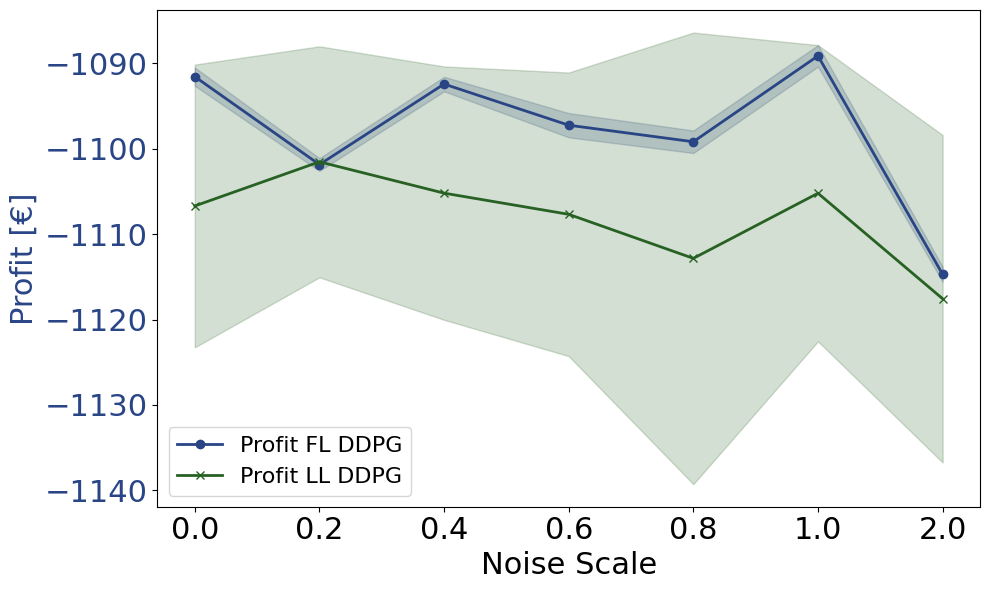

In [59]:
import os
import pandas as pd
import glob
import re

def load_cost_files_to_df(directory):
    # Load all CSV files from the specified directory that have 'cost' in their file name
    all_files = glob.glob(os.path.join(directory, "*Onlycost*.csv"))

    # Initialize dictionaries to store profits and standard deviations for FL and LL
    data = {
        "Noise Scale": ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0", "2.0"],
        "Profit FL DDPG": [],
        "Profit LL DDPG": [],
        "Profit RuleB": [],
        "STD FL DDPG": [],
        "STD LL DDPG": []
    }
    
    for noise_scale in data["Noise Scale"]:
        data["Profit FL DDPG"].append(None)
        data["Profit LL DDPG"].append(None)
        data["STD FL DDPG"].append(None)
        data["STD LL DDPG"].append(None)

    for file in all_files:
        df = pd.read_csv(file)
        
        # Identify the column that contains 'profit'
        profit_columns = [col for col in df.columns if 'profit' in col.lower()]
        
        if profit_columns:
            # Assuming there's only one profit column in each file
            profit_column = profit_columns[0]
            profit = df[profit_column].mean().round(2)
            
            # Check for the presence of the group column
            if 'Building' in df.columns:
                group_column = "Building"
            else:
                group_column = "Household"
            
            # Calculate the standard deviation
            profit_std = df.groupby(group_column)[profit_column].std().mean().round(2)
            if pd.isna(profit_std):
                profit_std = 0
            
            # Extract the noise scale from the file name
            noise_scale_match = re.search(r'FORECAST(\d+)', file)
            if noise_scale_match:
                noise_scale = noise_scale_match.group(1)
                if noise_scale == '1':
                    noise_scale = '1.0'
                elif noise_scale == '2':
                    noise_scale = '2.0'
                else:
                    noise_scale = f'{int(noise_scale) / 10:.1f}'
            else:
                noise_scale = 'unknown'
        
            # Extract the first part of the file name (e.g., "FL" or "LL")
            file_prefix = os.path.basename(file).split('_')[0]
            
            # Update the corresponding dictionary entries
            if noise_scale in data["Noise Scale"]:
                index = data["Noise Scale"].index(noise_scale)
                if file_prefix == "FL":
                    data["Profit FL DDPG"][index] = profit
                    data["STD FL DDPG"][index] = profit_std
                elif file_prefix == "LL":
                    data["Profit LL DDPG"][index] = profit
                    data["STD LL DDPG"][index] = profit_std

    return data

# Specify the directory containing the CSV files
directory = r"results\04forecast"

# Call the function and get the data
data = load_cost_files_to_df(directory)

# Add rule-based profit and standard deviation
rulebased_df = pd.read_csv(r"results\04forecast\ruleBased_Costs.csv")
rb_profit = rulebased_df["Profit"].mean().round(2)
rb_std = 0

data["Profit RuleB"] = [rb_profit] * len(data["Noise Scale"])
data["STD RuleB"] = [rb_std] * len(data["Noise Scale"])

# Print the resulting data
print(data)


df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting FL DDPG Profit
color_fl = '#294586'
ax1.set_xlabel('Noise Scale', fontsize=22)
ax1.set_ylabel('Profit [€]', color=color_fl, fontsize=22)
ax1.plot(df["Noise Scale"], df["Profit FL DDPG"], marker='o', color=color_fl, label='Profit FL DDPG [€]', linewidth=2)
ax1.fill_between(df["Noise Scale"], 
                 df["Profit FL DDPG"] - df["STD FL DDPG"], 
                 df["Profit FL DDPG"] + df["STD FL DDPG"], 
                 color=color_fl, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color_fl, labelsize=22)
ax1.tick_params(axis='x', labelsize=22)

# Plotting LL DDPG Profit
color_ll = '#276123'
ax1.plot(df["Noise Scale"], df["Profit LL DDPG"], marker='x', color=color_ll, label='Profit LL DDPG [€]', linewidth=2)
ax1.fill_between(df["Noise Scale"], 
                 df["Profit LL DDPG"] - df["STD LL DDPG"], 
                 df["Profit LL DDPG"] + df["STD LL DDPG"], 
                 color=color_ll, alpha=0.2)

# Adding Rule-Based Profit for comparison
#color_rb = '#903045'
#ax1.plot(df["Noise Scale"], df["Profit RuleB"], marker='s', color=color_rb, label='Profit Rule-Based [€]', linewidth=2)

# Add legends
fig.tight_layout()
profit_fl_line = plt.Line2D([], [], color='#294586', marker='o', linestyle='-', label='Profit FL DDPG', linewidth=2)
profit_ll_line = plt.Line2D([], [], color='#276123', marker='x', linestyle='-', label='Profit LL DDPG', linewidth=2)
#profit_rb_line = plt.Line2D([], [], color='#903045', marker='s', linestyle='-', label='Profit Rule-Based', linewidth=2)
ax1.legend(handles=[profit_fl_line, profit_ll_line], fontsize=16, loc='best')

# Show plot
plt.show()


In [60]:
import os
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

def load_cost_files_to_df(directory, selected_building):
    # Load all CSV files from the specified directory that have 'cost' in their file name
    all_files = glob.glob(os.path.join(directory, "*Onlycost*.csv"))

    # Initialize dictionaries to store profits and standard deviations for FL and LL
    data = {
        "Noise Scale": ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0", "2.0"],
        "Profit FL DDPG": [],
        "Profit LL DDPG": [],
        "STD FL DDPG": [],
        "STD LL DDPG": []
    }
    
    for noise_scale in data["Noise Scale"]:
        data["Profit FL DDPG"].append(None)
        data["Profit LL DDPG"].append(None)
        data["STD FL DDPG"].append(None)
        data["STD LL DDPG"].append(None)

    for file in all_files:
        df = pd.read_csv(file)
        
        # Identify the column that contains 'profit'
        profit_columns = [col for col in df.columns if 'profit' in col.lower()]
        
        if profit_columns:
            # Assuming there's only one profit column in each file
            profit_column = profit_columns[0]
            
            # Check for the presence of the group column
            if 'Building' in df.columns:
                group_column = "Building"
            else:
                group_column = "Household"
            
            # Extract the noise scale from the file name
            noise_scale_match = re.search(r'FORECAST(\d+)', file)
            if noise_scale_match:
                noise_scale = noise_scale_match.group(1)
                if noise_scale == '1':
                    noise_scale = '1.0'
                elif noise_scale == '2':
                    noise_scale = '2.0'
                else:
                    noise_scale = f'{int(noise_scale) / 10:.1f}'
            else:
                noise_scale = 'unknown'
        
            # Extract the first part of the file name (e.g., "FL" or "LL")
            file_prefix = os.path.basename(file).split('_')[0]
            
            # Filter the dataframe for the selected building
            df_filtered = df[df[group_column] == selected_building]
            
            # Update the corresponding dictionary entries
            if noise_scale in data["Noise Scale"]:
                index = data["Noise Scale"].index(noise_scale)
                profit = df_filtered[profit_column].mean().round(2)
                profit_std = df_filtered[profit_column].std().round(2)
                
                if file_prefix == "FL":
                    data["Profit FL DDPG"][index] = profit
                    data["STD FL DDPG"][index] = profit_std
                elif file_prefix == "LL":
                    data["Profit LL DDPG"][index] = profit
                    data["STD LL DDPG"][index] = profit_std

    return data

def plot_selected_building(directory, selected_building):
    # Load data
    data = load_cost_files_to_df(directory, selected_building)
    
    # Create the DataFrame from the data dictionary
    df = pd.DataFrame(data)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting FL DDPG Profit
    color_fl = '#294586'
    ax1.set_xlabel('Noise Scale', fontsize=22)
    ax1.set_ylabel('Profit [€]', color=color_fl, fontsize=22)
    ax1.plot(df["Noise Scale"], df["Profit FL DDPG"], marker='o', color=color_fl, label='Profit FL DDPG [€]', linewidth=2)
    ax1.fill_between(df["Noise Scale"], 
                     df["Profit FL DDPG"] - df["STD FL DDPG"], 
                     df["Profit FL DDPG"] + df["STD FL DDPG"], 
                     color=color_fl, alpha=0.2)
    ax1.tick_params(axis='y', labelcolor=color_fl, labelsize=22)
    ax1.tick_params(axis='x', labelsize=22)

    # Plotting LL DDPG Profit
    color_ll = '#276123'
    ax1.plot(df["Noise Scale"], df["Profit LL DDPG"], marker='x', color=color_ll, label='Profit LL DDPG [€]', linewidth=2)
    ax1.fill_between(df["Noise Scale"], 
                     df["Profit LL DDPG"] - df["STD LL DDPG"], 
                     df["Profit LL DDPG"] + df["STD LL DDPG"], 
                     color=color_ll, alpha=0.2)

    # Adding Rule-Based Profit for comparison
    rulebased_df = pd.read_csv(r"results\04forecast\ruleBased_Costs.csv")
    rb_profit = rulebased_df[rulebased_df['Household'] == selected_building]["Profit"].mean().round(2)
    rb_std = 0
    ax1.plot(df["Noise Scale"], [rb_profit] * len(df["Noise Scale"]), marker='s', color='#903045', label='Profit Rule-Based [€]', linewidth=2)

    # Add legends
    fig.tight_layout()
    profit_fl_line = plt.Line2D([], [], color='#294586', marker='o', linestyle='-', label='Profit FL DDPG', linewidth=2)
    profit_ll_line = plt.Line2D([], [], color='#276123', marker='x', linestyle='-', label='Profit LL DDPG', linewidth=2)
    profit_rb_line = plt.Line2D([], [], color='#903045', marker='s', linestyle='-', label='Profit Rule-Based', linewidth=2)
    ax1.legend(handles=[profit_fl_line, profit_ll_line, profit_rb_line], fontsize=16, loc='best')

    # Show plot
    plt.show()

# Specify the directory containing the CSV files
directory = r"results\04forecast"

# Call the function to plot for a specific building
selected_building = "Building1"  # replace with the actual building identifier you want to plot
plot_selected_building(directory, selected_building)


AttributeError: 'float' object has no attribute 'round'

KeyError: 'Profit User'

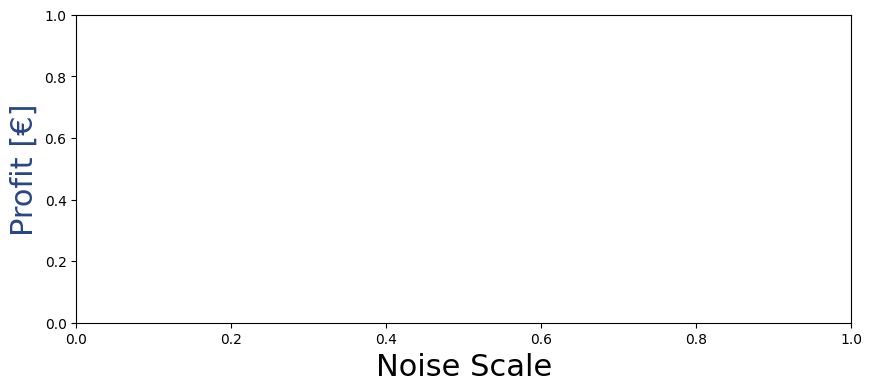

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided data
data = {
    "Noise Scale": ["0", "0.2", "0.4", "0.6", "0.8"],
    "Total Profit": [-103187.41, -105292.27, -105679.78, -108346.66, -111819.08],
    "Profit User": [-1146.53, -1169.91, -1174.22, -1203.85, -1242.43],
    "Profit STD": [28.31, 32.61, 23.63, 40.05, 126.65],
    "Total Emissions": [401560.96, 417108.6, 421044.54, 435368.28, 452339.23],
    "Emissions User": [4461.79, 4634.54, 4678.27, 4837.43, 5025.99],
    "Emissions STD": [187.16, 211.72, 163.11, 235.24, 676.87]
}

df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plotting Profit User
color = '#294586'
ax1.set_xlabel('Noise Scale', fontsize=22)
ax1.set_ylabel('Profit [€]', color=color, fontsize=22)
ax1.plot(df["Noise Scale"], df["Profit User"], marker='o', color=color, label='Profit [€]', linewidth=2)
ax1.fill_between(df["Noise Scale"], 
                 df["Profit User"] - df["Profit STD"], 
                 df["Profit User"] + df["Profit STD"], 
                 color=color, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color, labelsize=22)
ax1.tick_params(axis='x', labelsize=22)

# Create a secondary y-axis for Emissions User
ax2 = ax1.twinx()  
color = '#932929'
ax2.set_ylabel('Emissions [kg]', color=color, fontsize=22)
ax2.plot(df["Noise Scale"], df["Emissions User"], marker='x', color=color, label='Emissions [kg]', linewidth=2)
ax2.fill_between(df["Noise Scale"], 
                 df["Emissions User"] - df["Emissions STD"], 
                 df["Emissions User"] + df["Emissions STD"], 
                 color=color, alpha=0.2)
ax2.tick_params(axis='y', labelcolor=color, labelsize=22)

# Add legends
fig.tight_layout()
profit_line = plt.Line2D([], [], color='#294586', marker='o', linestyle='-', label='Profit', linewidth=2)
emissions_line = plt.Line2D([], [], color='#932929', marker='x', linestyle='-', label='Emissions', linewidth=2)
ax1.legend(handles=[profit_line, emissions_line], fontsize=22, loc='center left')

# Save the plot as a PDF file
plt.savefig('Impact_Forecast_Noise.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()
